# Leyendo datos desde archivos

Para leer datos desde archivos existen distintas funciones en julia que nos facilitarán las cosas.

Para abrir un archivo en específico debemos usar `open(File)`, dónde `File` es el nombre del archivo, y asignarle un nombre:

In [19]:
f = open("../../Country_Trends.csv")
read(f,String)


3.0366889784040633e-152

La función "read(f,String)" convierte todo el contenido del archivo en una cadena larguísima difícil de leer para una persona. 

Muchas veces es más intuitivo usar la función `readlines(f)` la cual crea un arreglo y cada línea la guarda en uno de los elementos.

In [42]:
f = open("../../Country_Trends.csv")
crudos = readlines(f)


57-element Array{String,1}:
 "Country Name,Short Name,year,Record,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total,Data Quality Score,isoa2"                                 
 "World,º World,1961,Earths,0.008500975544980471,0.32090927422091237,0.15005432190910348,0.030537847374192732,0.13753181875665313,0.08476816540056233,0.7323033985086098,3A,null"
 "World,º World,1962,Earths,0.008954578988683744,0.3327709890119096,0.1556370743606515,0.031739516253512214,0.1378141979312748,0.08500926597496361,0.7519247224972782,3A,null"   
 "World,º World,1963,Earths,0.00916712420467374,0.3563043471651519,0.157349484031966,0.03274787328683753,0.13916673785044356,0.08667428475957202,0.781409580785848,3A,null"      
 "World,º World,1964,Earths,0.009579691679215713,0.3777615356994305,0.1616579826847227,0.03193353514692798,0.14344938322290868,0.0856096938041128,0.8099916562809215,3A,null"    
 "World,º World,1965,Earths,0.00986752257666456,0.3973840309576907,0.1639038277947

Ahora podemos leerlos más fácil. Sin embargo, aún tenemos que depurar los datos para poder graficarlos. Debemos hacer dos cosas:
1. Identificar y escoger las columnas que nos interesan 
2. Convertir cada elemento en números

En este caso nuestro archivo está separado por comas, es por eso que usamos la función `split()` indicando que la coma es el delimitador entre columnas.

In [22]:
split(crudos[1],",")

13-element Array{SubString{String},1}:
 "Country Name"      
 "Short Name"        
 "year"              
 "Record"            
 "Built-up Land"     
 "Carbon"            
 "Cropland"          
 "Fishing Grounds"   
 "Forest Products"   
 "Grazing Land"      
 "Total"             
 "Data Quality Score"
 "isoa2"             

Creamos dos arreglos vacíos en los cuales se guardarán los datos listos para graficar:

In [31]:
tiempo =[]
totales =[]


13-element Array{SubString{String},1}:
 "World"               
 "º World"             
 "1961"                
 "Earths"              
 "0.008500975544980471"
 "0.32090927422091237" 
 "0.15005432190910348" 
 "0.030537847374192732"
 "0.13753181875665313" 
 "0.08476816540056233" 
 "0.7323033985086098"  
 "3A"                  
 "null"                

In [43]:
t=split(crudos[2],",")[3]
push!(tiempo,t)
tiempo

2-element Array{Any,1}:
 "1961"
 "1961"

Si queremos borrar algún elemento del arreglo hacemos uso de `deleteat!()`. Por ejemplo, borraremos el elemento `2` de el arreglo `tiempo`

In [44]:
deleteat!(tiempo,2)

1-element Array{Any,1}:
 "1961"

In [45]:
tiempo

1-element Array{Any,1}:
 "1961"

In [46]:
tot=split(crudos[2],",")[11]

"0.7323033985086098"

Ahora solamente nos falta convertir las cadenas a arreglos (usamos `parse()`). Para no hacerlo para las 57 líneas del documento usamos un `for`.

In [60]:
t

"2016"

In [61]:
parse(Int64,t)

2016

In [21]:
f=open("../../Country_Trends.csv")
crudos=readlines(f)
tiempo =[]
totales =[]

for i in 2:length(crudos)
    t=split(crudos[i],",")[3]
    push!(tiempo,parse(Int64,t))
    tot=split(crudos[i],",")[11]
    push!(totales,parse(Float64,tot))
end

In [1]:
using Plots
gr()

Plots.GRBackend()

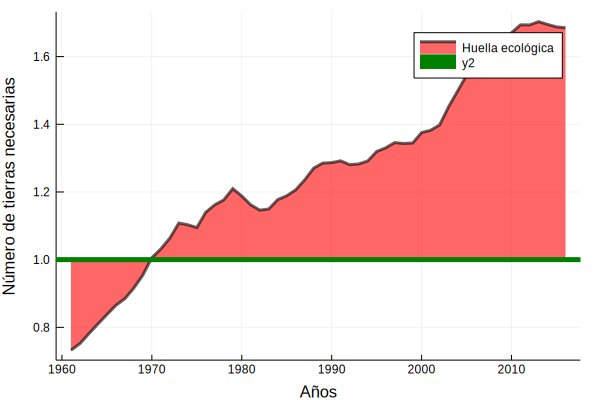

In [22]:
plot(tiempo,totales,fill=(1,:red), c=:black,lw=3,α=0.6,ylabel="Número de tierras necesarias",xlabel="Años",lab="Huella ecológica")
hline!([1],fill=(1,:green),c=:green,linewidth=5,α=1)

In [2]:
f=open("../../Country_Trends_World_pp.csv")
crudos=readlines(f)
tiempo =[]
totales =[]

for i in 2:length(crudos)
    t=split(crudos[i],",")[3]
    push!(tiempo,parse(Int64,t))
    tot=split(crudos[i],",")[11]
    push!(totales,parse(Float64,tot))
end

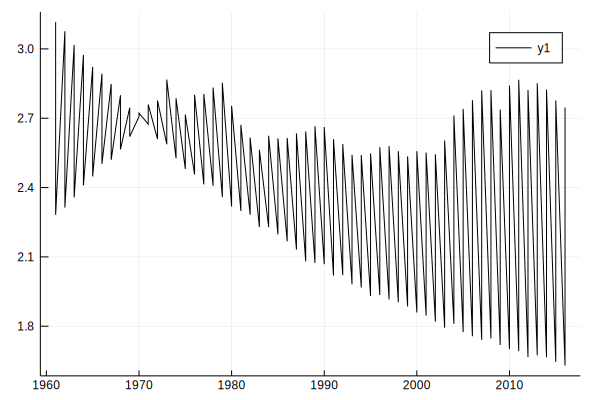

In [3]:
plot(tiempo,totales, c=:black,lw=1)

Esta gráfica es muy rara. Debemos ver los datos con cuidado. En la segunda columna de "year" podemos ver que los años se repiten y en la columan "Record" podemos ver dos etiquetas: "BioCapPerCap" y "EFConsPerCap".

Es por eso que debemos dividir en dos nuestros arreglos.

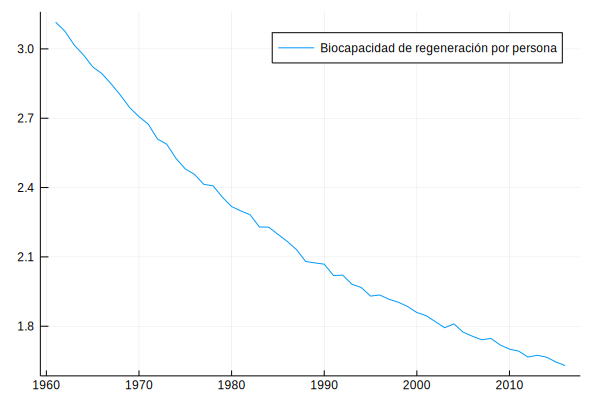

In [11]:
plot(tiempo[1:2:end],totales[1:2:end],lab="Biocapacidad de regeneración por persona")

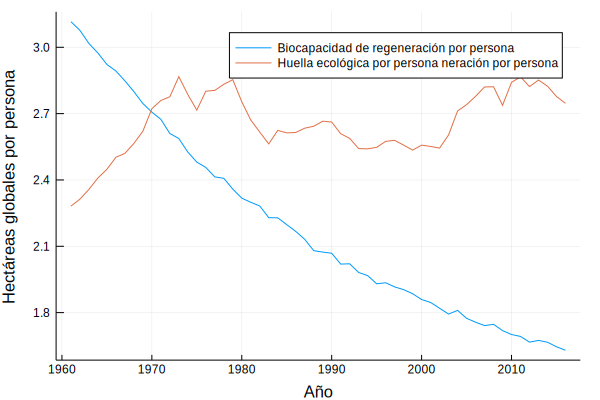

In [12]:
plot!(tiempo[2:2:end],totales[2:2:end],lab="Huella ecológica por persona regeneración por persona",xlabel="Año",ylabel="Hectáreas globales por persona")

## Ejercicio
* ¿Cuál es el papel de México en estos años? Haz dos gráficas en las que se muestre la evolución de la huella ecológica en persona y en número de tierras.
* Grafica la evolución temporal de huella ecológica por persona para cada uno de los recursos en México.

Aquí podrás descargar los datos de México: en hectáreas globales por [persona](https://github.com/mvillasante/Programacion_I/blob/master/Notas/Mexico_gha_per_person.csv) y número de [tierras](https://github.com/mvillasante/Programacion_I/blob/master/Notas/Mexico_numeros_tierras.csv) 